In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
from random import randint
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import MNIST

In [2]:
x_train_rfc = MNIST.x_train
y_train_rfc = MNIST.y_train
x_test_rfc = MNIST.x_test
y_test_rfc = MNIST.y_test

In [3]:
clf_rfc = RandomForestClassifier()

In [4]:
clf_rfc.fit(x_train_rfc, y_train_rfc)

RandomForestClassifier()

In [5]:
predicted_rfc = clf_rfc.predict(x_test_rfc)
expected_rfc = y_test_rfc

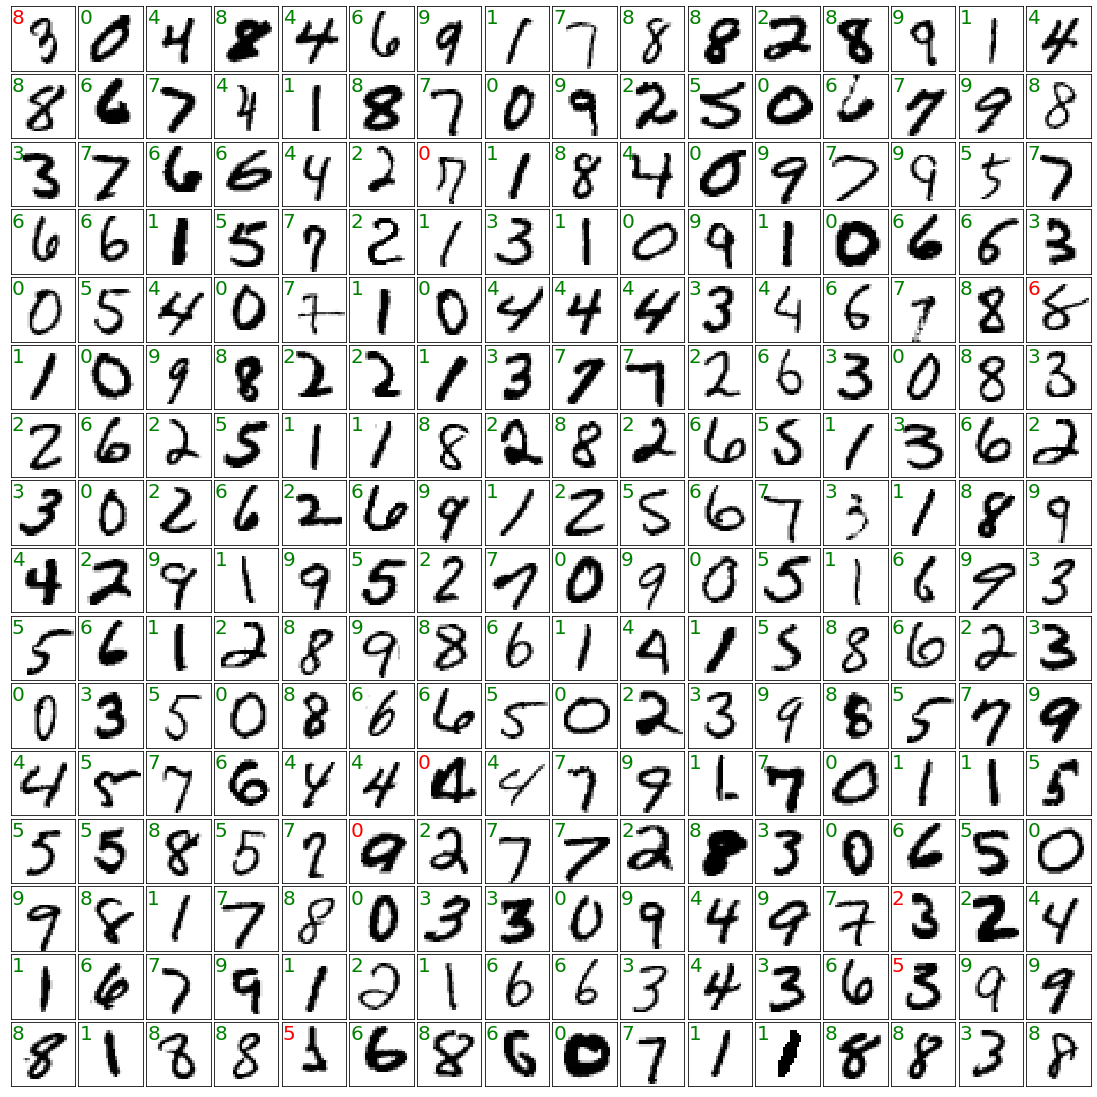

In [6]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for j in range(256):
    i = randint(0, len(predicted_rfc) - 1)
    ax = fig.add_subplot(16, 16, j + 1, xticks=[], yticks=[])
    ax.imshow(x_test_rfc.reshape(-1, 28, 28)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    if predicted_rfc[i] == expected_rfc[i]:
        ax.text(0, 7, str(predicted_rfc[i]), fontsize=20, color='green')
    else:
        ax.text(0, 7, str(predicted_rfc[i]), fontsize=20, color='red')

In [7]:
print(metrics.classification_report(expected_rfc, predicted_rfc))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [8]:
d_rfc = [array for array in metrics.confusion_matrix(expected_rfc, predicted_rfc)]
data_matrix_rfc = {"0": d_rfc[0], "1": d_rfc[1], "2": d_rfc[2], "3": d_rfc[3], "4": d_rfc[4], \
                   "5": d_rfc[5], "6": d_rfc[6], "7": d_rfc[7], "8": d_rfc[8], "9": d_rfc[9]}
df_matrix_rfc = pd.DataFrame(data=data_matrix_rfc)
df_matrix_rfc

,0,1,2,3,4,5,6,7,8,9
0,970,0,7,0,1,2,6,2,5,7
1,0,1122,0,0,0,0,3,4,0,5
2,1,2,1000,8,3,1,0,21,4,1
3,0,3,7,974,0,11,0,0,8,11
4,0,1,2,0,957,2,4,1,4,14
5,3,2,0,6,0,861,5,0,8,5
6,3,3,3,0,4,6,935,0,5,1
7,1,1,8,9,0,2,0,986,3,4
8,2,1,5,10,2,4,5,4,928,4
9,0,0,0,3,15,3,0,10,9,957
